In [94]:
%load_ext autoreload

%autoreload 2

import pandas as pd
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
restaurants_raw = pd.read_csv(r"data_hyderabad/105_restaurants.csv")
reviews_raw = pd.read_csv(r"data_hyderabad/10k_reviews.csv")

In [96]:
import re

# find the ratings in reviews
example = """
smoked salmon Croissant 4.5/5
mushroom melt 4/5
Smoked salmon bagel 3.5/5
prawn croissant 4.5/5"""


example_ratings = reviews_raw.iloc[881]['Review']

rating_review_pattern = re.compile(r"([a-zA-Z\s]+)\s([\d\.]+\/\d)", re.IGNORECASE)
ratings = rating_review_pattern.findall(example_ratings)
print(ratings)



[('d rate food', '3/5'), ('\r\nAmbience', '4/5'), ('\r\nLocation', '4/5')]


In [97]:
# Apply the regex pattern to the "Review" column to extract ratings
reviews_raw['Extracted_Ratings'] = reviews_raw['Review'].apply(lambda x: rating_review_pattern.findall(x) if isinstance(x, str) else [])

# Display the DataFrame with the new column
reviews_raw[['Review', 'Extracted_Ratings']]
reviews_raw.sort_values(by='Extracted_Ratings', ascending=False)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Extracted_Ratings
543,The Fisherman's Wharf,Rajen_6packfoodie,#6packfoodie goes The Fisherman's Wharf!\r\n\r...,3,"55 Reviews , 682 Followers",4/21/2019 10:40,3,"[(why, 3/5)]"
3230,Marsala Food Company,Sudhir Raju,Starters were served cold...all they did was r...,1,"2 Reviews , 9 Followers",4/5/2019 14:16,0,[(we had buffet and some of the items were mis...
3366,Club Rogue,Pranay Agarwal,this place freakin crazy lil fuzzy over crowde...,4,"122 Reviews , 1206 Followers",2/15/2019 18:59,0,[(this place freakin crazy lil fuzzy over crow...
4054,Frio Bistro,Kalyan Ch,This place was on my list for a long time.\r\n...,1,"9 Reviews , 2 Followers",12/30/2018 20:19,0,"[(t serve a, 1/2)]"
5076,Gal Punjab Di,Mrutunjay Kinagi,Best paratha you can get in Hyderabad in Gachi...,5,"15 Reviews , 324 Followers",8/21/2018 21:06,0,"[(s little expensive but, 10/1)]"
...,...,...,...,...,...,...,...,...
3368,Club Rogue,Maria.cancer78,Hello...\r\nThe ambience is amazing..and the f...,4,1 Review,2/15/2019 15:39,0,[]
3369,Club Rogue,Aditya Reddy,Worst place in Hyderabad. Staff has no etiquet...,1,"5 Reviews , 1 Follower",2/13/2019 20:07,0,[]
3370,Club Rogue,Amlan Dutta,Ambiance is good. There is a dance floor with ...,2,"17 Reviews , 68 Followers",2/13/2019 9:40,0,[]
3371,Club Rogue,Vaishnavi,My friend gave his birthday treat here! We opt...,3,"21 Reviews , 51 Followers",2/11/2019 2:37,0,[]


```markdown
##EDA

In [98]:
import matplotlib.pyplot as plt

reviews_ratings = reviews_raw.groupby('Rating').agg({'Review': 'count'})
reviews_ratings

,Review
Rating,
1,1735
1.5,9
2,684
2.5,19
3,1192
3.5,47
4,2373
4.5,69
5,3826


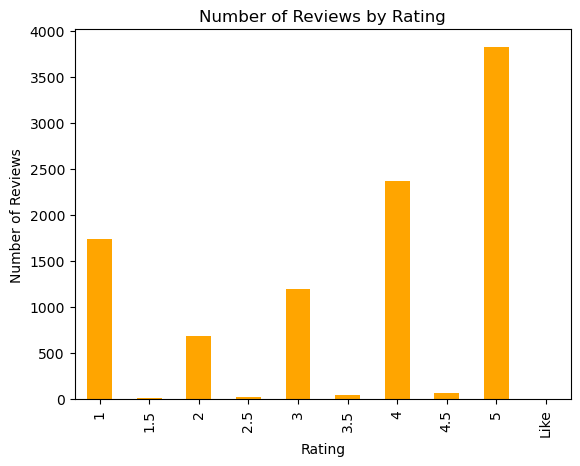

In [99]:
reviews_ratings.plot(kind='bar', legend=False, color = 'orange')
plt.title('Number of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [100]:
non_integer_ratings = reviews_raw[reviews_raw['Rating'].apply(lambda x: '.' in str(x))]
non_integer_ratings

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Extracted_Ratings
975,Cream Stone,Yashwant Darsi,It's too crowded with delivery executives all ...,3.5,"14 Reviews , 83 Followers",11/13/2018 20:09,0,[]
1151,Barbeque Nation,The Foodie Bookworm,We are very satisfied with the food and the se...,4.5,"108 Reviews , 242 Followers",10/25/2018 7:57,0,[]
1188,Barbeque Nation,Deepak,Quick review points\r\n- slippery floor .. be ...,2.5,"2 Reviews , 3 Followers",6/23/2018 14:54,0,[]
2170,Jonathan's Kitchen - Holiday Inn Express & Suites,Devyani Agrawal,Amazing food. The way they serve it will make ...,4.5,"13 Reviews , 67 Followers",2/14/2019 23:23,0,[]
2831,Behrouz Biryani,Nikita.ved,Biryani is good but they didn't deliver ...I h...,2.5,"1 Review , 2 Followers",12/21/2018 13:19,0,[]
...,...,...,...,...,...,...,...,...
9987,Chinese Pavilion,Deba Das,Initially thought of going to Wonton (Gachibow...,3.5,"31 Reviews , 101 Followers",7/24/2016 16:44,3,"[(\r\nTASTE, 3.1/5), (\r\nSERVICE, 5/5), (\r\n..."
9994,Chinese Pavilion,Shiladitya Chaudhury,Chinese Pavilion in Banjara HIlls was the firs...,1.5,"6 Reviews , 3 Followers",6/5/2016 10:49,0,[]
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,[]
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,[]


In [101]:
ratings_restaurants = reviews_raw.groupby('Restaurant').agg({'Rating': 'value_counts'}).unstack(fill_value=0)
ratings_restaurants.loc['Total'] = ratings_restaurants.sum()
ratings_restaurants

Rating                                   \
Rating                                     1 1.5    2 2.5     3 3.5     4 4.5   
Restaurant                                                                      
10 Downing Street                          7   0    5   0    14   0    49   0   
13 Dhaba                                  22   0    7   0     8   0    27   0   
3B's - Buddies, Bar & Barbecue             2   0    4   0     1   0     2   0   
AB's - Absolute Barbecues                  0   0    2   0     1   0     4   0   
Absolute Sizzlers                         20   0    7   0     9   0    19   0   
...                                      ...  ..  ...  ..   ...  ..   ...  ..   
Yum Yum Tree - The Arabian Food Court     12   0   14   0    16   0    22   0   
Zega - Sheraton Hyderabad Hotel            1   0    2   0     8   0    29   0   
Zing's Northeast Kitchen                  13   0   10   0    13   0    27   0   
eat.fit                                   27   0    7   0    15   0    21   0   
Total                                   1735   9  684  19  1193  47  2373  69   

                                                  
Rating                                    5 Like  
Restaurant                                        
10 Downing Street                        25    0  
13 Dhaba                                 36    0  
3B's - Buddies, Bar & Barbecue           91    0  
AB's - Absolute Barbecues                93    0  
Absolute Sizzlers                        45    0  
...                                     ...  ...  
Yum Yum Tree - The Arabian Food Court    36    0  
Zega - Sheraton Hyderabad Hotel          60    0  
Zing's Northeast Kitchen                 37    0  
eat.fit                                  30    0  
Total                                  3832    1  

[101 rows x 10 columns]

```markdown
## Sentiment Analysis - Transformers


In [102]:
import Preprocessing
import re

In [103]:
reviews_data = reviews_raw[reviews_raw["Rating"].notna() & reviews_raw["Review"].notna()]
reviews_data.isna().sum()

Restaurant           0
Reviewer             0
Review               0
Rating               0
Metadata             0
Time                 0
Pictures             0
Extracted_Ratings    0
dtype: int64

In [104]:
reviews_data.drop(reviews_data[reviews_data['Rating']=='Like'].index, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8340\1159352641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_data.drop(reviews_data[reviews_data['Rating']=='Like'].index, inplace=True)


In [105]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Restaurant         9954 non-null   object
 1   Reviewer           9954 non-null   object
 2   Review             9954 non-null   object
 3   Rating             9954 non-null   object
 4   Metadata           9954 non-null   object
 5   Time               9954 non-null   object
 6   Pictures           9954 non-null   int64 
 7   Extracted_Ratings  9954 non-null   object
dtypes: int64(1), object(7)
memory usage: 699.9+ KB


In [117]:
reviews_data['Review'] = reviews_data['Review'].astype(str)
reviews_data['Rating'] = reviews_data['Rating'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_8340\39945892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_data['Review'] = reviews_data['Review'].astype(str)
C:\Users\User\AppData\Local\Temp\ipykernel_8340\39945892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_data['Rating'] = reviews_data['Rating'].astype(float)


In [118]:
reviews_data['Preprocessed_Review'] = reviews_data['Review'].apply(lambda x: Preprocessing.main_pipeline(
    x,no_hashtags=False,
    no_newlines=True,
    no_urls=True,
    no_punctuation=False,
    print_output=False, 
    lowercase=False, 
    lemmatized=False,
    stemmed=False, 
    pos_tags_list="no_pos",))

C:\Users\User\AppData\Local\Temp\ipykernel_8340\970097854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_data['Preprocessed_Review'] = reviews_data['Review'].apply(lambda x: Preprocessing.main_pipeline(


In [119]:
reviews_preproc = reviews_data.copy()

In [120]:
##isue with review 96, 2066,6335 same problem

reviews_preproc.iloc[96]

Restaurant                                               Beyond Flavours
Reviewer                                                    Kailash Sain
Review                 I really enjoyed the follows....\r\nThe entran...
Rating                                                               5.0
Metadata                                                        1 Review
Time                                                      5/3/2019 20:10
Pictures                                                               0
Extracted_Ratings                                                     []
Preprocessed_Review    I really enjoyed the The entrance, the music, ...
Name: 96, dtype: object

In [121]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer
from scipy.special import softmax

In [122]:
model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_model = AutoModelForSequenceClassification.from_pretrained(model)
sentiment_tokenizer = AutoTokenizer.from_pretrained(model)
#optimus_primer = pipeline("sentiment-analysis", model=sentiment_model, tokenizer=sentiment_tokenizer)

c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\transformers\modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly all

In [129]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis", model=sentiment_model, tokenizer=sentiment_tokenizer, max_length=510,truncation=True)

In [138]:
reviews_sentiment_label = reviews_preproc.copy()

In [127]:
from tqdm import tqdm

sentiments = []
for review in tqdm(reviews_sentiment_label['Preprocessed_Review'], desc="Processing reviews"):
    try:
        sentiment = sentiment_task(review, max_length=510, truncation=True)
        sentiments.append(sentiment[0])
    except RuntimeError as e:
        print(f"RuntimeError for review: {review}\nError: {e}")
        sentiments.append({'label': 'error', 'score': 0.0})

reviews_sentiment_label['Sentiment_Label'] = [sentiment['label'] for sentiment in sentiments]
reviews_sentiment_label['Sentiment_Score'] = [sentiment['score'] for sentiment in sentiments]

Processing reviews:   3%|▎         | 336/9954 [00:37<18:01,  8.89it/s]


KeyboardInterrupt: 

In [140]:
reviews_sentiment_label = pd.read_csv('reviews_sentiment_label.csv')

In [141]:
reviews_sentiment_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           9954 non-null   object 
 1   Reviewer             9954 non-null   object 
 2   Review               9954 non-null   object 
 3   Rating               9954 non-null   float64
 4   Metadata             9954 non-null   object 
 5   Time                 9954 non-null   object 
 6   Pictures             9954 non-null   int64  
 7   Preprocessed_Review  9952 non-null   object 
 8   Sentiment_Label      9954 non-null   object 
 9   Sentiment_Score      9954 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 777.8+ KB


In [142]:
reviews_sentiment_label['Sentiment_Label'] = reviews_sentiment_label['Sentiment_Label'].map({'negative': 0, 'neutral': 1,'positive': 2})

In [143]:
reviews_sentiment_label.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Preprocessed_Review,Sentiment_Label,Sentiment_Score
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,"The ambience was good, food was quite good. ha...",2,0.975001
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Ambience is too good for a pleasant evening. S...,2,0.978647
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,A must try.. great food great ambience. Thnx f...,2,0.988044
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,Soumen das and Arun was a great guy. Only beca...,2,0.972271
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Food is good. we ordered Kodi drumsticks and b...,2,0.980803


In [144]:
#0 - negative, 1 - neutral, 2 - positive
reviews_sentiment_label['Rating_label'] = reviews_sentiment_label['Rating'].apply(lambda x: 2 if x > 3.5 else 0 if x < 2.5 else 1)

In [145]:
reviews_sentiment_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           9954 non-null   object 
 1   Reviewer             9954 non-null   object 
 2   Review               9954 non-null   object 
 3   Rating               9954 non-null   float64
 4   Metadata             9954 non-null   object 
 5   Time                 9954 non-null   object 
 6   Pictures             9954 non-null   int64  
 7   Preprocessed_Review  9952 non-null   object 
 8   Sentiment_Label      9954 non-null   int64  
 9   Sentiment_Score      9954 non-null   float64
 10  Rating_label         9954 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 855.5+ KB


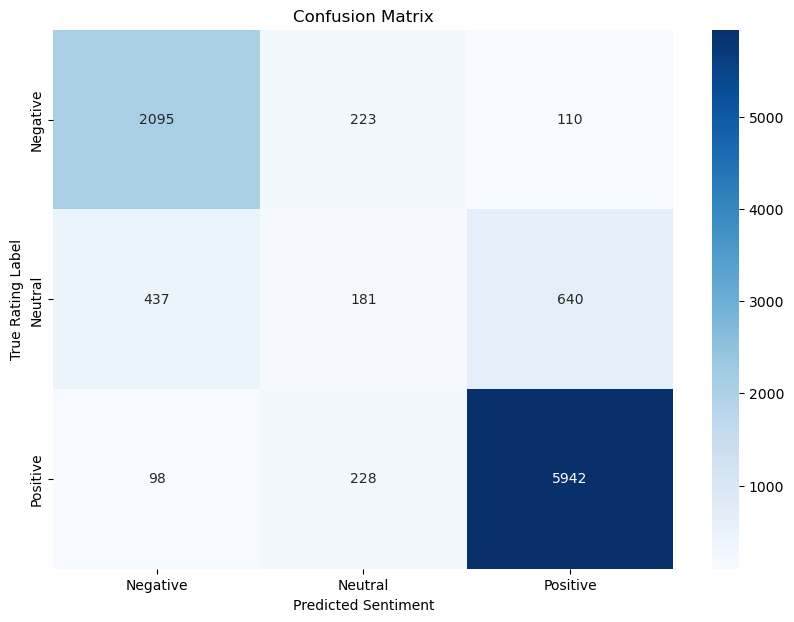

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Create the confusion matrix
conf_matrix = confusion_matrix(reviews_sentiment_label['Rating_label'], reviews_sentiment_label['Sentiment_Label'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Rating Label')
plt.title('Confusion Matrix')
plt.show()

In [148]:
accuracy = (conf_matrix.trace()) / conf_matrix.sum()
accuracy

0.8255977496483825

In [149]:
from sklearn.metrics import classification_report

true_labels = reviews_sentiment_label['Rating_label']
predicted_labels = reviews_sentiment_label['Sentiment_Label']

report = classification_report(true_labels, predicted_labels, target_names=['Negative', 'Neutral', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.80      0.86      0.83      2428
     Neutral       0.29      0.14      0.19      1258
    Positive       0.89      0.95      0.92      6268

    accuracy                           0.83      9954
   macro avg       0.66      0.65      0.65      9954
weighted avg       0.79      0.83      0.80      9954



SENTIMENT ANALYSIS WITH PROBABILITIES

In [150]:
reviews_sentiment_polariy = reviews_preproc.copy()

In [ ]:
def optimus_sentimenter(review):
    encoded_input = sentiment_tokenizer(review, return_tensors='pt', truncation=True, max_length=510)
    sent = sentiment_model(**encoded_input)
    sent_scores = softmax(sent[0][0].detach().numpy())
    sent_scores_dict = {
    'negative': sent_scores[0],
    'neutral': sent_scores[1],
    'positive': sent_scores[2]}
    return sent_scores_dict

In [ ]:
negative_scores = []
neutral_scores = []
positive_scores = []

for review in reviews_sentiment_polariy['Preprocessed_Review']:
    try:
        scores = optimus_sentimenter(review)
        negative_scores.append(scores['negative'])
        neutral_scores.append(scores['neutral'])
        positive_scores.append(scores['positive'])
    except RuntimeError as e:
        print(f"RuntimeError for review: {review}\nError: {e}")
        negative_scores.append(None)
        neutral_scores.append(None)
        positive_scores.append(None)

reviews_sentiment_polariy['negative'] = negative_scores
reviews_sentiment_polariy['neutral'] = neutral_scores
reviews_sentiment_polariy['positive'] = positive_scores

In [153]:
#This model outputs 3 labels and their scores: negative, netural and positive. We then calculate polarity score.
#Polarity score = (negatives - positives) / (negatives + positives)
reviews_sentiment_polariy = pd.read_csv('reviews_sentiment_polarity.csv')

In [154]:
reviews_sentiment_polariy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           9954 non-null   object 
 1   Reviewer             9954 non-null   object 
 2   Review               9954 non-null   object 
 3   Rating               9954 non-null   float64
 4   Metadata             9954 non-null   object 
 5   Time                 9954 non-null   object 
 6   Pictures             9954 non-null   int64  
 7   Preprocessed_Review  9952 non-null   object 
 8   negative             9954 non-null   float64
 9   neutral              9954 non-null   float64
 10  positive             9954 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 855.5+ KB


In [157]:
reviews_sentiment_polariy['Polarity'] = (reviews_sentiment_polariy['positive'] - reviews_sentiment_polariy['negative'])/ \
(reviews_sentiment_polariy['positive'] + reviews_sentiment_polariy['negative'])

In [ ]:
reviews_sentiment_polariy['Rating_Scaled'] = ((reviews_sentiment_polariy['Rating'].astype(float) - 1) / 2) - 1

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Preprocessed_Review,negative,neutral,positive,Polarity,Rating_Scaled
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,"The ambience was good, food was quite good. ha...",0.004108,0.020891,0.975001,0.991608,1.00
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Ambience is too good for a pleasant evening. S...,0.005603,0.015750,0.978647,0.988615,1.00
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,A must try.. great food great ambience. Thnx f...,0.003418,0.008538,0.988044,0.993104,1.00
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,Soumen das and Arun was a great guy. Only beca...,0.006249,0.021480,0.972271,0.987228,1.00
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Food is good. we ordered Kodi drumsticks and b...,0.003587,0.015610,0.980803,0.992711,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,Madhumathi Mahajan Well to start with nice cou...,0.018283,0.111681,0.870036,0.958837,0.00
9950,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,This place has never disappointed us.. The foo...,0.004934,0.011973,0.983094,0.990013,0.75
9951,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,"Bad rating is mainly because of "" Chicken Bone...",0.531457,0.389869,0.078674,-0.742109,-0.75
9952,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,I personally love and prefer Chinese Food. Had...,0.003832,0.013546,0.982623,0.992231,0.50


In [223]:
corr_spearman = reviews_sentiment_polariy[['Rating_Scaled', 'Polarity']].corr(method='spearman')
corr_pearson = reviews_sentiment_polariy[['Rating_Scaled', 'Polarity']].corr(method='pearson')

print(f"Spearman correlation: {round(corr_spearman.iloc[0][1],2)}")
print(f"Pearson correlation: {round(corr_pearson.iloc[0][1],2)}")

Spearman correlation: 0.73
Pearson correlation: 0.84


In [162]:
reviews_sentiment_polariy.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Preprocessed_Review,negative,neutral,positive,Polarity,Rating_Scaled
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,"The ambience was good, food was quite good. ha...",0.004108,0.020891,0.975001,0.991608,1.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Ambience is too good for a pleasant evening. S...,0.005603,0.015750,0.978647,0.988615,1.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,A must try.. great food great ambience. Thnx f...,0.003418,0.008538,0.988044,0.993104,1.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,Soumen das and Arun was a great guy. Only beca...,0.006249,0.021480,0.972271,0.987228,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Food is good. we ordered Kodi drumsticks and b...,0.003587,0.015610,0.980803,0.992711,1.0


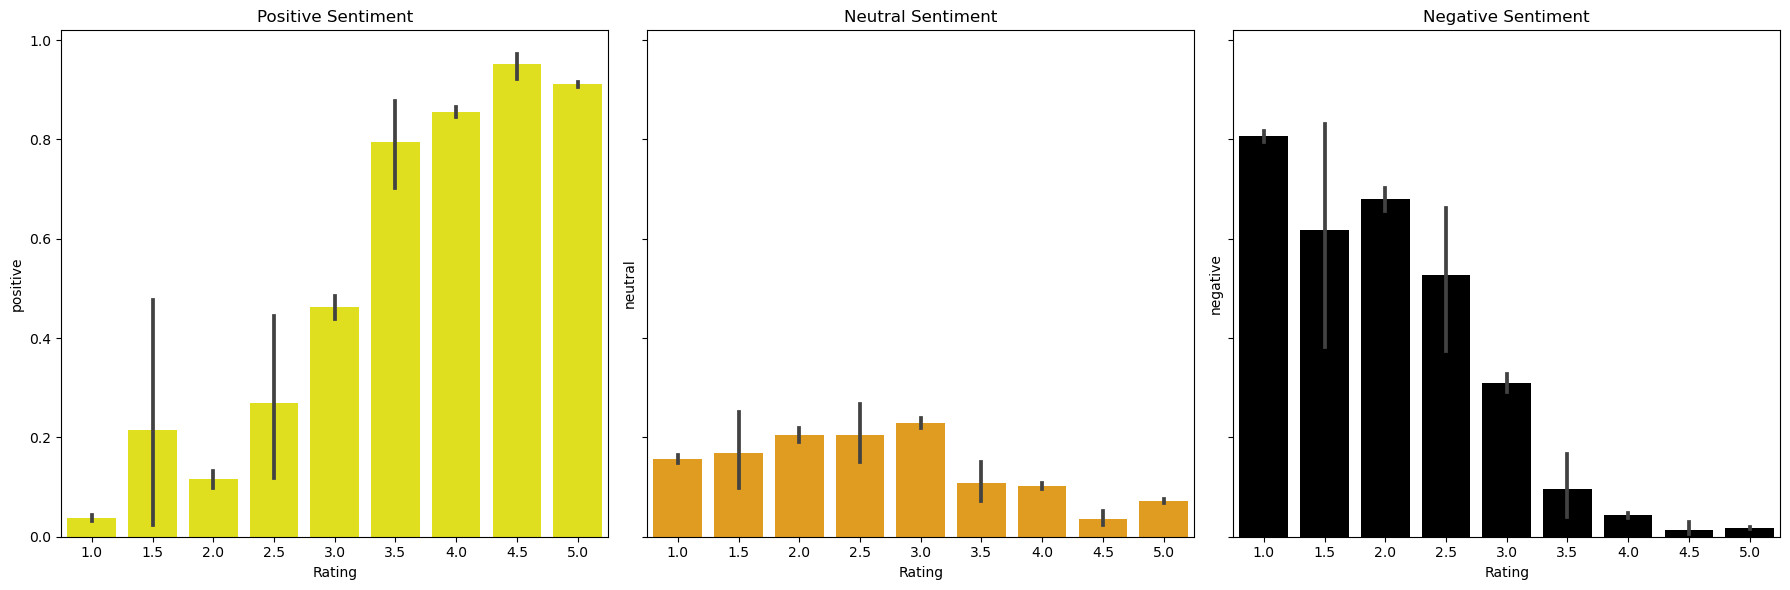

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(data=reviews_sentiment_polariy, x='Rating', y='positive',color='yellow', ax=axes[0])
axes[0].set_title('Positive Sentiment')

sns.barplot(data=reviews_sentiment_polariy, x='Rating', y='neutral', color='orange', ax=axes[1])
axes[1].set_title('Neutral Sentiment')

sns.barplot(data=reviews_sentiment_polariy, x='Rating', y='negative', color='black', label='negative', ax=axes[2])
axes[2].set_title('Negative Sentiment')

plt.tight_layout()
plt.show()

In [ ]:
# Reviews that were rated as negative (rating 1 , 1.5, 2) but model classified as positive
reviews_sent_pos = reviews_sentiment_polariy[(reviews_sentiment_polariy['Rating'] <2.5) & (reviews_sentiment_polariy['Polarity'] > 0.5)].sort_values(by='Polarity', ascending=False)
reviews_sent_pos.groupby('Rating')['Polarity'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1.0,40.0,0.843234,0.129840,0.503860,0.746833,0.878669,0.954903,0.988703
1.5,2.0,0.966347,0.018141,0.953519,0.959933,0.966347,0.972761,0.979175
2.0,72.0,0.839747,0.148170,0.507940,0.754081,0.908628,0.968074,0.990361


In [207]:
# Reviews that were rated as neutral (rating 2.5, 3 , 3.5) but model classified as negative
reviews_sent_nue = reviews_sentiment_polariy[(reviews_sentiment_polariy['Rating'] >=2.5) & (reviews_sentiment_polariy['Rating'] <4)
                                             & (reviews_sentiment_polariy['Polarity'] < -0.25)]\
                                                 .sort_values(by='Polarity', ascending=False)
reviews_sent_nue.groupby('Rating')['Polarity'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
2.5,12.0,-0.872876,0.124472,-0.977427,-0.965497,-0.940307,-0.744798,-0.635713
3.0,463.0,-0.825768,0.189478,-0.989099,-0.968213,-0.916485,-0.737101,-0.253424
3.5,4.0,-0.870590,0.125972,-0.979141,-0.964993,-0.897753,-0.803350,-0.707712


In [ ]:
# Reviews that were rated as neutral (rating 2.5, 3 , 3.5) but model classified as positive
reviews_sent_nue2 = reviews_sentiment_polariy[(reviews_sentiment_polariy['Rating'] >=2.5) & (reviews_sentiment_polariy['Rating'] <4)
                                             & (reviews_sentiment_polariy['Polarity'] > 0.5)]\
                                                 .sort_values(by='Polarity', ascending=False)
reviews_sent_nue2.groupby('Rating')['Polarity'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
2.5,4.0,0.975864,0.013757,0.956067,0.971749,0.981006,0.985122,0.985376
3.0,602.0,0.910393,0.114116,0.500109,0.877738,0.962855,0.985038,0.996161
3.5,40.0,0.958159,0.098455,0.522065,0.972163,0.988669,0.992931,0.994876


In [ ]:
#Reviews that were rated as positive (4, 4.5 or 5), but model classified as negatve
reviews_sent_neg = reviews_sentiment_polariy[(reviews_sentiment_polariy['Rating'] >=4) & \
                                             (reviews_sentiment_polariy['Polarity'] < -0.25)]\
                                                 .sort_values(by='Polarity', ascending=False)
reviews_sent_neg.groupby('Rating')['Polarity'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
4.0,107.0,-0.737218,0.204333,-0.987786,-0.918556,-0.803038,-0.580396,-0.262694
4.5,1.0,-0.796625,NaN,-0.796625,-0.796625,-0.796625,-0.796625,-0.796625
5.0,30.0,-0.712925,0.210267,-0.981282,-0.906770,-0.736401,-0.560483,-0.282108


EMOTION DETECTION

In [224]:
model_emotion = f"cardiffnlp/twitter-roberta-base-emotion"
emotion_model = AutoModelForSequenceClassification.from_pretrained(model_emotion)
emotion_tokenizer = AutoTokenizer.from_pretrained(model_emotion)
#optimus_primer = pipeline("sentiment-analysis", model=sentiment_model, tokenizer=sentiment_tokenizer)

c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\transformers\modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly all

In [226]:
import urllib.request
import csv
import numpy as np

In [227]:
# download label mapping
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
labels

['anger', 'joy', 'optimism', 'sadness']

In [256]:
reviews_emotions = reviews_preproc.copy()

In [258]:
# Initialize lists to store scores for each emotion
joy_scores = []
optimism_scores = []
anger_scores = []
sadness_scores = []

for review in tqdm(reviews_emotions['Preprocessed_Review']):
    encoded_input = emotion_tokenizer(review, return_tensors='pt', truncation=True, max_length=510)
    output = emotion_model(**encoded_input)
    scores = softmax(output[0][0].detach().numpy())
    
    # Append scores to respective lists
    joy_scores.append(scores[labels.index('joy')])
    optimism_scores.append(scores[labels.index('optimism')])
    anger_scores.append(scores[labels.index('anger')])
    sadness_scores.append(scores[labels.index('sadness')])

# Create new columns in the DataFrame
reviews_emotions['joy'] = joy_scores
reviews_emotions['optimism'] = optimism_scores
reviews_emotions['anger'] = anger_scores
reviews_emotions['sadness'] = sadness_scores


  1%|          | 60/9954 [00:06<18:59,  8.68it/s]


KeyboardInterrupt: 

In [263]:
reviews_emotions = pd.read_csv('reviews_emotions.csv')

In [267]:
reviews_emotions=reviews_emotions[['Rating', 'Preprocessed_Review', 'joy', 'optimism', 'anger', 'sadness']]

In [283]:
reviews_emotions_neg = reviews_emotions[(reviews_emotions['Rating'] < 2.5)]
mean_emotions_neg = reviews_emotions_neg.groupby('Rating').mean().reset_index()
mean_emotions_neg

C:\Users\User\AppData\Local\Temp\ipykernel_8340\3905692646.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_emotions_neg = reviews_emotions_neg.groupby('Rating').mean().reset_index()


,Rating,joy,optimism,anger,sadness
0,1.0,0.036229,0.016372,0.804027,0.143371
1,1.5,0.073985,0.019328,0.766965,0.139722
2,2.0,0.103319,0.030055,0.658492,0.208134


C:\Users\User\AppData\Local\Temp\ipykernel_8340\3222391197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_emotions = reviews_emotions.groupby('Rating').mean().reset_index()


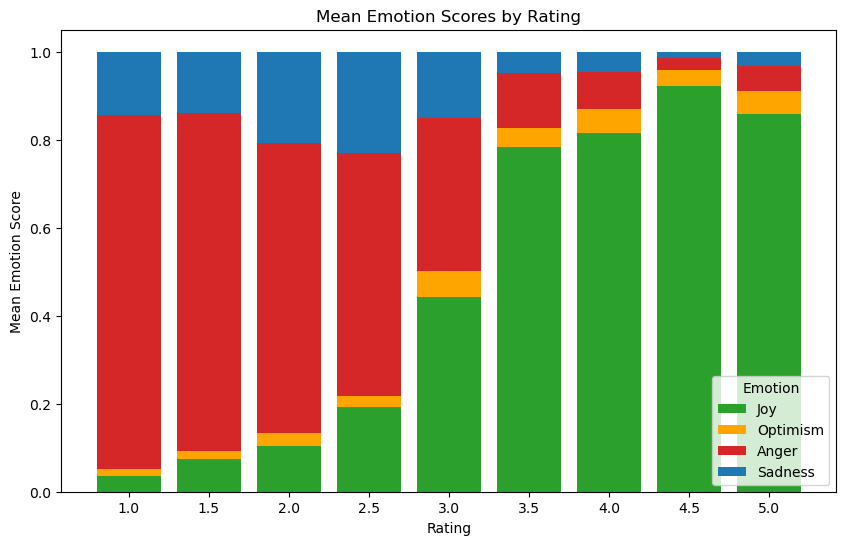

In [294]:
import matplotlib.pyplot as plt
import numpy as np

# Reviews that were rated as negative
mean_emotions = reviews_emotions.groupby('Rating').mean().reset_index()

# Extract data
ratings = mean_emotions['Rating']
joy = mean_emotions['joy']
optimism = mean_emotions['optimism']
anger = mean_emotions['anger']
sadness = mean_emotions['sadness']

# Bar positions
x = np.arange(len(ratings))

# Plot stacked bars with new color palette
plt.figure(figsize=(10, 6))
plt.bar(x, joy, label='Joy', color='#2ca02c')
plt.bar(x, optimism, bottom=joy, label='Optimism', color='#ffa500')
plt.bar(x, anger, bottom=joy + optimism, label='Anger', color='#d62728')
plt.bar(x, sadness, bottom=joy + optimism + anger, label='Sadness', color='#1f77b4')

# Add labels, legend, and title
plt.xticks(x, ratings)
plt.xlabel('Rating')
plt.ylabel('Mean Emotion Score')
plt.title('Mean Emotion Scores by Rating')
plt.legend(title='Emotion')

# Show plot
plt.show()


In [275]:
# Reviews that were rated as neutral
reviews_emotions_neu = reviews_emotions[(reviews_emotions['Rating'] >2) & (reviews_emotions['Rating'] <4)]
reviews_emotions_neu.groupby('Rating').mean()

C:\Users\User\AppData\Local\Temp\ipykernel_8340\3755010546.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reviews_emotions_neu.groupby('Rating').mean()


,joy,optimism,anger,sadness
Rating,,,,
2.5,0.191433,0.027169,0.552293,0.229105
3.0,0.441682,0.061010,0.347203,0.150105
3.5,0.783951,0.043434,0.125244,0.047370


In [276]:
# Reviews that were rated as positive
reviews_emotions_pos = reviews_emotions[(reviews_emotions['Rating']>3.5)]
reviews_emotions_pos.groupby('Rating').mean()

C:\Users\User\AppData\Local\Temp\ipykernel_8340\4122995346.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reviews_emotions_pos.groupby('Rating').mean()


,joy,optimism,anger,sadness
Rating,,,,
4.0,0.816333,0.054272,0.083645,0.045749
4.5,0.921670,0.037501,0.025861,0.014968
5.0,0.858456,0.052262,0.056971,0.032311
